Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error
)
from sklearn.neighbors import KNeighborsClassifier

Load The Dataset

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Purchase_Logistic.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Categorical value exist ,need to map with binary value

In [ ]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
df.shape#small dataset

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

is there any missing value

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


No missing value

In [ ]:
df[df.duplicated(keep='first')]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [ ]:
print(df.describe())

            User ID      Gender         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000  400.000000       400.000000  400.000000
mean   1.569154e+07    0.510000   37.655000     69742.500000    0.357500
std    7.165832e+04    0.500526   10.482877     34096.960282    0.479864
min    1.556669e+07    0.000000   18.000000     15000.000000    0.000000
25%    1.562676e+07    0.000000   29.750000     43000.000000    0.000000
50%    1.569434e+07    1.000000   37.000000     70000.000000    0.000000
75%    1.575036e+07    1.000000   46.000000     88000.000000    1.000000
max    1.581524e+07    1.000000   60.000000    150000.000000    1.000000


In [ ]:
print(df["Purchased"].value_counts())

Purchased
0    257
1    143
Name: count, dtype: int64


Imbalance Dataset


In [ ]:
print(" ID is unique:", df["User ID"].is_unique)

 ID is unique: True


ID is unique so we remove this column for our training model

Visualise the Features


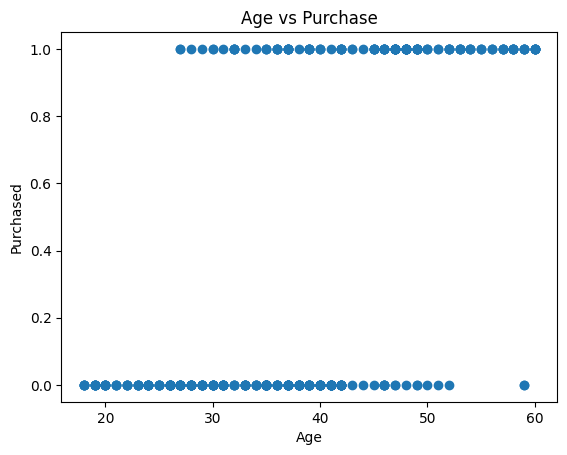

In [ ]:
plt.figure()
plt.scatter(df["Age"], df["Purchased"])
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("Age vs Purchase")
plt.show()

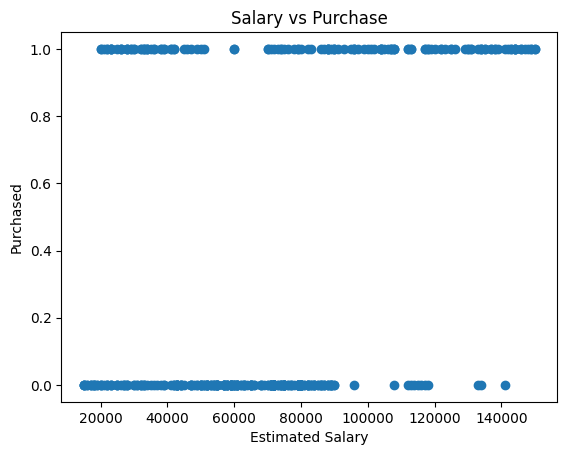

In [ ]:
plt.figure()
plt.scatter(df["EstimatedSalary"], df["Purchased"])
plt.xlabel("Estimated Salary")
plt.ylabel("Purchased")
plt.title("Salary vs Purchase")
plt.show()

We can say from the graph :-Purchased contains only 0 and 1

No label noise like 2, -1...

Outlier Check

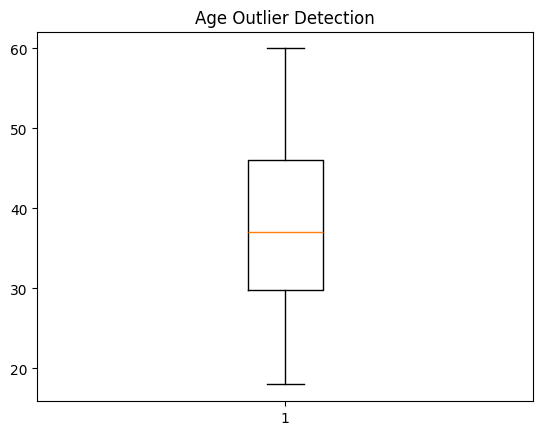

In [ ]:
plt.boxplot(df["Age"])
plt.title("Age Outlier Detection")
plt.show()


boxplot shows that the Age feature does not contain any outliers based on the IQR method. All values fall within the acceptable range, indicating that Age is a clean and reliable feature for modeling

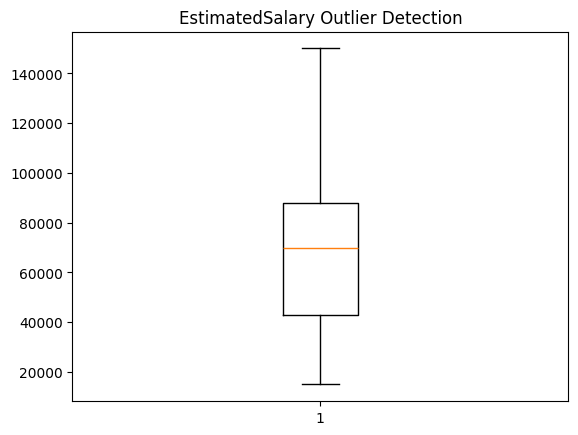

In [ ]:
plt.boxplot(df["EstimatedSalary"])
plt.title("EstimatedSalary Outlier Detection")
plt.show()

No Outlier

Training The Model

In [ ]:
X = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

In [ ]:
cv_accuracy = cross_val_score(
    log_model,
    X,
    y,
    cv=skf,
    scoring="accuracy"
)

In [ ]:
print("\nStratified K-Fold CV Results")
print("Fold Accuracies:", cv_accuracy)
print("Mean CV Accuracy:", cv_accuracy.mean())


Stratified K-Fold CV Results
Fold Accuracies: [0.86 0.8  0.85 0.86]
Mean CV Accuracy: 0.8425


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [ ]:
print("\n-Logistic Regression Metrics (Test Set)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
print("MSE :", mse)
print("RMSE :", rmse)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


-Logistic Regression Metrics (Test Set)
Accuracy : 0.81
Precision: 0.8148148148148148
Recall   : 0.6111111111111112
F1 Score : 0.6984126984126984
MSE : 0.11970373863326507
RMSE : 0.34598228080823024

Confusion Matrix:
[[59  5]
 [14 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        64
           1       0.81      0.61      0.70        36

    accuracy                           0.81       100
   macro avg       0.81      0.77      0.78       100
weighted avg       0.81      0.81      0.80       100



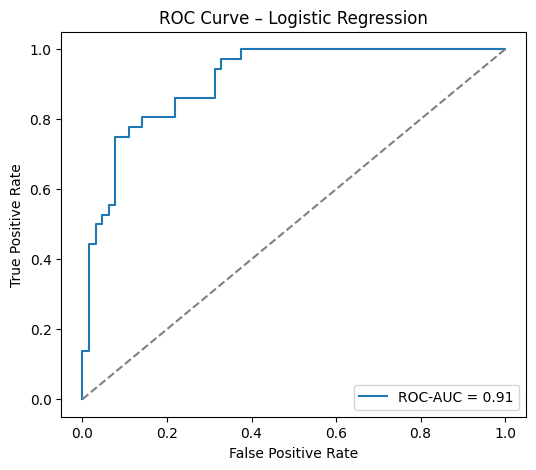

ROC-AUC Score: 0.9105902777777778


In [ ]:
# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc_score)

Decision Boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


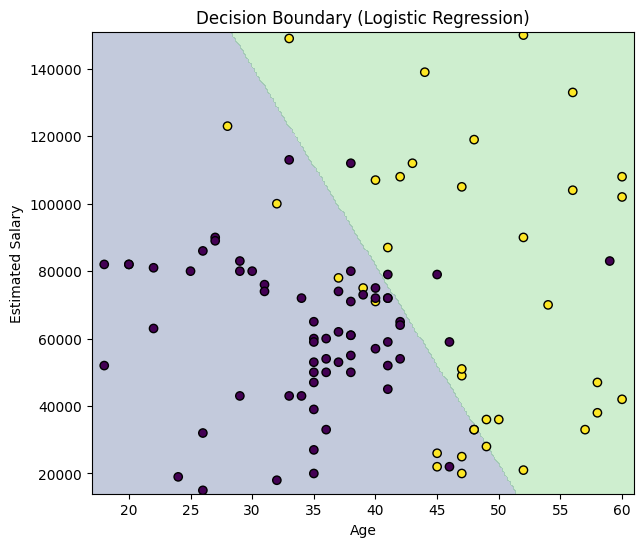

In [ ]:
import numpy as np
fixed_gender = 0
# Create mesh grid
age_min, age_max = X["Age"].min() - 1, X["Age"].max() + 1
sal_min, sal_max = X["EstimatedSalary"].min() - 1000, X["EstimatedSalary"].max() + 1000

age_grid, sal_grid = np.meshgrid(
    np.linspace(age_min, age_max, 200),
    np.linspace(sal_min, sal_max, 200)
)

# Prepare input for prediction
grid_data = np.c_[
    np.full(age_grid.ravel().shape, fixed_gender),
    age_grid.ravel(),
    sal_grid.ravel()
]

# Predict probabilities on grid
prob_grid = log_model.predict_proba(grid_data)[:, 1]
prob_grid = prob_grid.reshape(age_grid.shape)

# Plot decision boundary
plt.figure(figsize=(7, 6))
plt.contourf(age_grid, sal_grid, prob_grid >= 0.5, alpha=0.3)
plt.scatter(
    X_test["Age"],
    X_test["EstimatedSalary"],
    c=y_test,
    edgecolor="k"
)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Decision Boundary (Logistic Regression)")
plt.show()


 visualise the results by plotting how probability varies with difference features

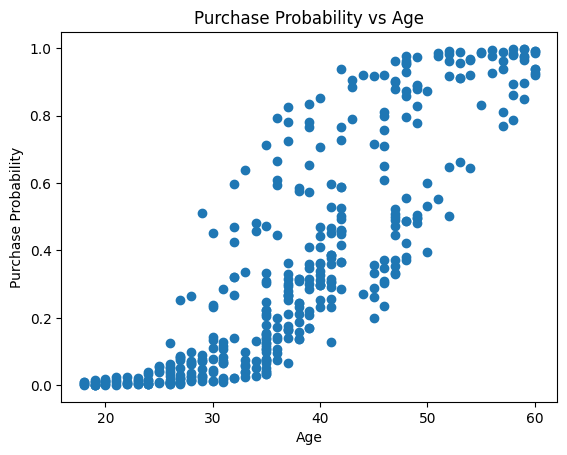

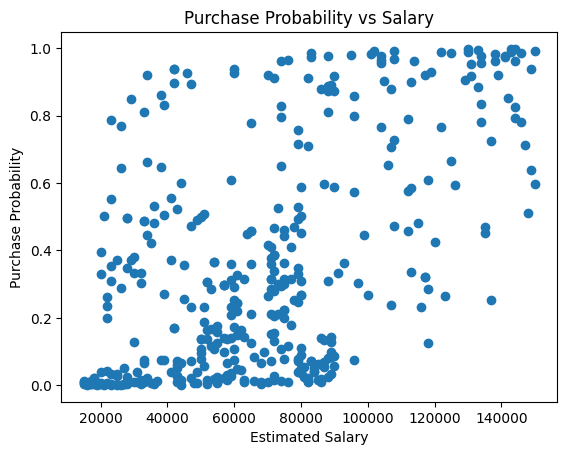

In [ ]:
df["Purchase_Probability"] = log_model.predict_proba(X)[:, 1]

plt.figure()
plt.scatter(df["Age"], df["Purchase_Probability"])
plt.xlabel("Age")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability vs Age")
plt.show()

plt.figure()
plt.scatter(df["EstimatedSalary"], df["Purchase_Probability"])
plt.xlabel("Estimated Salary")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability vs Salary")
plt.show()


Age is a dominant feature over other features ,because its graph is most likely same to sigmoid


Handle Imbalance

In [ ]:
log_model_balance = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight="balanced"))#class_weight="balanced":-Reweights classes to handle imbalance
])


In [ ]:
cv_accuracy_balance = cross_val_score(
    log_model_balance,
    X,
    y,
    cv=skf,
    scoring="accuracy"
)

In [ ]:
log_model_balance.fit(X_train, y_train)

y_pred = log_model_balance.predict(X_test)
y_prob = log_model_balance.predict_proba(X_test)[:, 1]

In [ ]:
print("\nLogistic Regression Metrics (Test Set)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
print("MSE      :", mse)
print("RMSE     :", rmse)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Metrics (Test Set)
Accuracy : 0.83
Precision: 0.7435897435897436
Recall   : 0.8055555555555556
F1 Score : 0.7733333333333333
MSE      : 0.12254909562757772
RMSE     : 0.35007012958488437

Confusion Matrix:
[[54 10]
 [ 7 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.74      0.81      0.77        36

    accuracy                           0.83       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



Accuracy increase from 0.81 to 0.83.


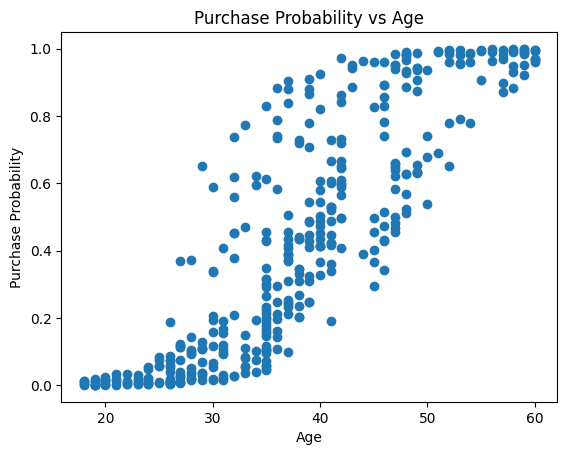

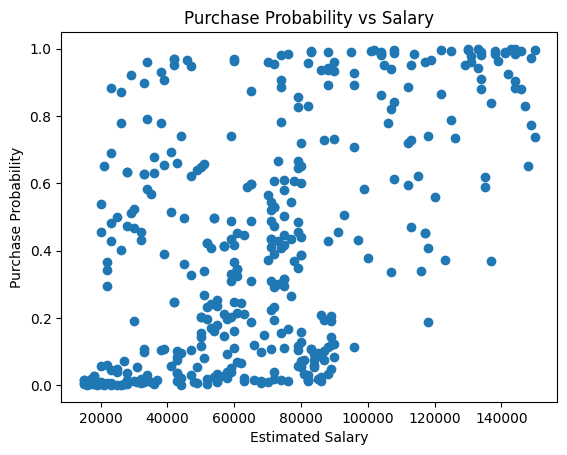

In [ ]:
df["Purchase_Probability"] = log_model_balance.predict_proba(X)[:, 1]

plt.figure()
plt.scatter(df["Age"], df["Purchase_Probability"])
plt.xlabel("Age")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability vs Age")
plt.show()

plt.figure()
plt.scatter(df["EstimatedSalary"], df["Purchase_Probability"])
plt.xlabel("Estimated Salary")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability vs Salary")
plt.show()

KNN

In [ ]:
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=7,
        weights="distance"
    ))
])

In [ ]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print("\n-KNN Metrics (Test Set)")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


-KNN Metrics (Test Set)
Accuracy : 0.91
Precision: 0.8648648648648649
Recall   : 0.8888888888888888
F1 Score : 0.8767123287671232

Confusion Matrix:
[[59  5]
 [ 4 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.86      0.89      0.88        36

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    knn_model,
    X,
    y,
    cv=skf,
    scoring="accuracy"
)

print("\n Stratified K-Fold Cross-Validation")
print("Fold Accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


 Stratified K-Fold Cross-Validation
Fold Accuracies: [0.8875 0.95   0.875  0.9    0.9   ]
Mean CV Accuracy: 0.9025000000000001


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


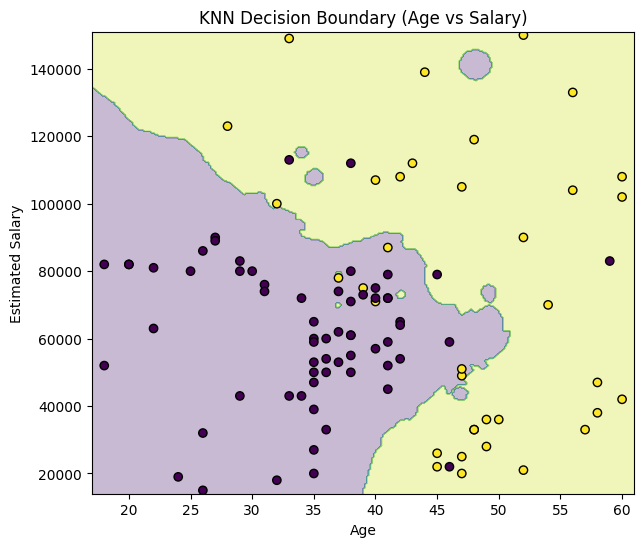

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fixed_gender = 0  # Male

# Create mesh grid
age_min, age_max = X["Age"].min() - 1, X["Age"].max() + 1
sal_min, sal_max = X["EstimatedSalary"].min() - 1000, X["EstimatedSalary"].max() + 1000

age_grid, sal_grid = np.meshgrid(
    np.linspace(age_min, age_max, 300),
    np.linspace(sal_min, sal_max, 300)
)

grid_points = np.c_[
    np.full(age_grid.ravel().shape, fixed_gender),
    age_grid.ravel(),
    sal_grid.ravel()
]

# Predict class on grid
Z = knn_model.predict(grid_points)
Z = Z.reshape(age_grid.shape)

# Plot decision boundary
plt.figure(figsize=(7, 6))
plt.contourf(age_grid, sal_grid, Z, alpha=0.3)
plt.scatter(
    X_test["Age"],
    X_test["EstimatedSalary"],
    c=y_test,
    edgecolor="k"
)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("KNN Decision Boundary (Age vs Salary)")
plt.show()


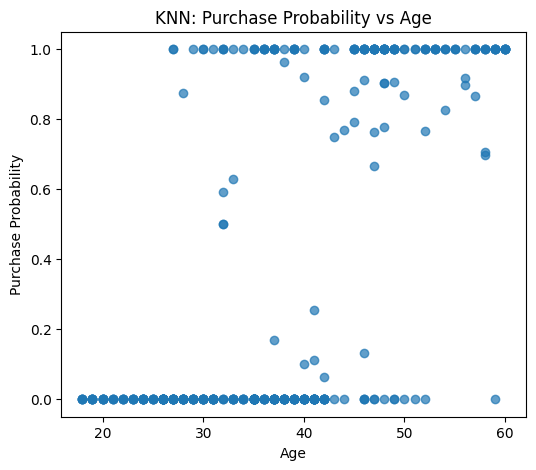

In [ ]:
knn_prob = knn_model.predict_proba(X)[:, 1]

plt.figure(figsize=(6, 5))
plt.scatter(X["Age"], knn_prob, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Purchase Probability")
plt.title("KNN: Purchase Probability vs Age")
plt.show()


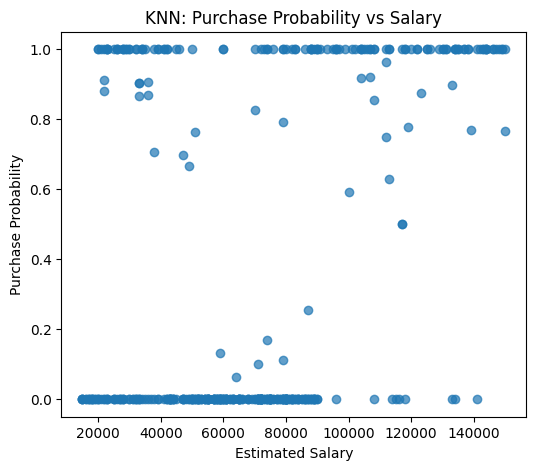

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X["EstimatedSalary"], knn_prob, alpha=0.7)
plt.xlabel("Estimated Salary")
plt.ylabel("Purchase Probability")
plt.title("KNN: Purchase Probability vs Salary")
plt.show()


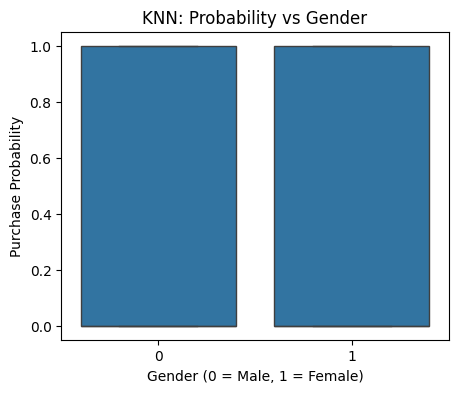

In [ ]:
import seaborn as sns

df_knn = df.copy()
df_knn["KNN_Probability"] = knn_prob

plt.figure(figsize=(5, 4))
sns.boxplot(x="Gender", y="KNN_Probability", data=df_knn)
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Purchase Probability")
plt.title("KNN: Probability vs Gender")
plt.show()


Handle Imbalance


In [ ]:
knn_model_balance = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=10,weights="distance"))
])

knn_model_balance.fit(X_train, y_train)
y_pred_knn_balance = knn_model_balance.predict(X_test)

In [ ]:
print("\nKNN Balance ---")
print("Accuracy :", accuracy_score(y_test, y_pred_knn_balance))
print("Precision:", precision_score(y_test, y_pred_knn_balance))
print("Recall   :", recall_score(y_test, y_pred_knn_balance))
print("F1 Score :", f1_score(y_test, y_pred_knn_balance))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_balance))


KNN Balance ---
Accuracy : 0.9
Precision: 0.8611111111111112
Recall   : 0.8611111111111112
F1 Score : 0.8611111111111112
Confusion Matrix:
 [[59  5]
 [ 5 31]]


K-clustering



--- Cluster Summary ---
               Age  EstimatedSalary  Purchased  Count
Cluster                                              
0        29.048649     56848.648649   0.027027    185
1        45.060465     80837.209302   0.641860    215

--- Sample with Custom Customer Type ---
   Age  EstimatedSalary  Purchased  Cluster       Customer_Type
0   19            19000          0        0  Low-Value Customer
1   35            20000          0        0  Low-Value Customer
2   26            43000          0        0  Low-Value Customer
3   27            57000          0        0  Low-Value Customer
4   19            76000          0        0  Low-Value Customer


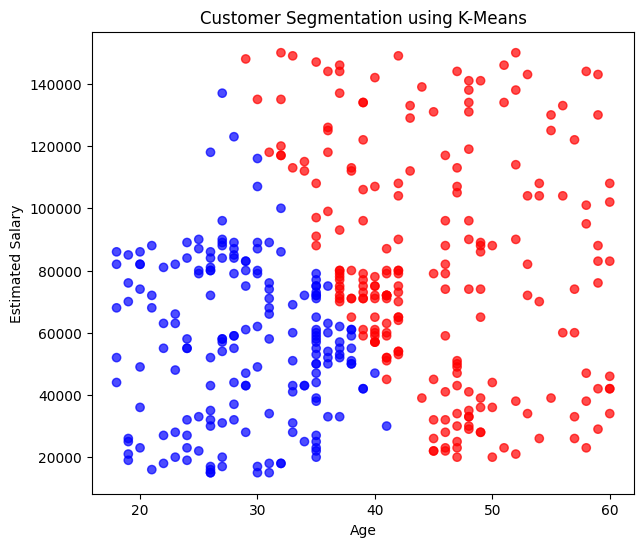

In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Purchase_Logistic.csv")


df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

X_cluster = df[["Age", "EstimatedSalary"]]


# Scale Features (IMPORTANT)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


#  Apply K-Means Clustering

kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


#Analyze Clusters

cluster_summary = df.groupby("Cluster").agg({
    "Age": "mean",
    "EstimatedSalary": "mean",
    "Purchased": "mean",
    "Cluster": "count"
})

cluster_summary.rename(columns={"Cluster": "Count"}, inplace=True)

print("\n--- Cluster Summary ---")
print(cluster_summary)


# Create CUSTOM CUSTOMER TYPE (Custom DataType)

# Identify which cluster is high-value
high_value_cluster = cluster_summary["Purchased"].idxmax()

def assign_customer_type(cluster):
    if cluster == high_value_cluster:
        return "High-Value Customer"
    else:
        return "Low-Value Customer"

df["Customer_Type"] = df["Cluster"].apply(assign_customer_type)

# Final Dataset with Custom Datatype

print("\n--- Sample with Custom Customer Type ---")
print(df[["Age", "EstimatedSalary", "Purchased", "Cluster", "Customer_Type"]].head())


#  Visualize Clusters with Custom Labels

plt.figure(figsize=(7, 6))
colors = df["Customer_Type"].map({
    "Low-Value Customer": "blue",
    "High-Value Customer": "red"
})

plt.scatter(
    df["Age"],
    df["EstimatedSalary"],
    c=colors,
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Customer Segmentation using K-Means")
plt.show()
